In [5]:
#Goal of this notebook: Given early engagement numbers (likes, shares, comments, diggs, upload hour, etc.) 
# → predict how many views the video will eventually reach.

import pandas as pd
import numpy as np

In [6]:
#reading the training data

df = pd.read_csv("train.csv")
df

,url,digg_count,play_count,share_count,repost_count,collect_count,comment_count,video_id,author_id,duration,description,create_time,author_unique_id,location_created
0,https://www.tiktok.com/@zachking/video/1001169...,857800.0,1700000.0,476.0,0.0,335.0,1508.0,100116967235219456,6.861650e+16,0.0,When it's trash night at my house #dailylife,1464212460,zachking,NaN
1,https://www.tiktok.com/@zachking/video/1164457...,1100000.0,2000000.0,637.0,0.0,467.0,1988.0,116445712837398528,6.861650e+16,15.0,#MamaSaid to always be a gentleman,1468105536,zachking,NaN
2,https://www.tiktok.com/@zachking/video/1165721...,1000000.0,2100000.0,790.0,0.0,455.0,2683.0,116572195421646848,6.861650e+16,11.0,I've got #NoMoney ...oh wait,1468135692,zachking,NaN
3,https://www.tiktok.com/@zachking/video/1185885...,1200000.0,2600000.0,3157.0,0.0,1616.0,7378.0,118588521136766976,6.861650e+16,13.0,#PikachuBeatDrop I found a pikachu,1468616422,zachking,NaN
4,https://www.tiktok.com/@zachking/video/1214467...,806700.0,2300000.0,831.0,0.0,513.0,2287.0,121446730818019328,6.861650e+16,15.0,My heart will go on forever #badflutesong,1469297872,zachking,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,https://www.tiktok.com/@zachking/video/8334847...,1100000.0,2000000.0,329.0,0.0,296.0,1879.0,83348477484662785,6.861650e+16,15.0,A magical #StopMotion,1460214540,zachking,NaN
2056,https://www.tiktok.com/@zachking/video/8564247...,1100000.0,1900000.0,1110.0,0.0,586.0,2222.0,85642476228616192,6.861650e+16,13.0,Practicing a little magic trick #muserMagicShow,1460761472,zachking,NaN
2057,https://www.tiktok.com/@zachking/video/8605376...,746300.0,1700000.0,315.0,0.0,225.0,1358.0,86053768974213120,6.861650e+16,7.0,Do something simple and fun with a loved one. ...,1460859532,zachking,NaN
2058,https://www.tiktok.com/@zachking/video/8728339...,965200.0,2100000.0,986.0,0.0,512.0,2326.0,87283398238429184,6.861650e+16,7.0,Rolling out of bed in the morning #DailyLife,1461152698,zachking,NaN


In [7]:
df_clean = df[[
    "digg_count",
    "share_count",
    "repost_count",
    "collect_count",
    "comment_count",
    "duration",
    "create_time",
    "play_count"
]].copy()

In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2060 entries, 0 to 2059
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   digg_count     2057 non-null   float64
 1   share_count    2057 non-null   float64
 2   repost_count   2057 non-null   float64
 3   collect_count  2057 non-null   float64
 4   comment_count  2057 non-null   float64
 5   duration       2057 non-null   float64
 6   create_time    2060 non-null   int64  
 7   play_count     2057 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 128.9 KB


In [9]:
#there are only few rows which have missing/null data, we will just remove them because it won't create a significant 
#difference with our result

In [10]:
df_clean = df_clean.dropna()

In [11]:
# Data cleaned - ready for feature engineering
#FEATURE ENGINEERING: create_time has the date time basically, but we want the hour it was posted (cause that's more crucial)

In [12]:
from datetime import datetime

df_clean["upload_hour"] = df_clean["create_time"].apply(
    lambda x: datetime.fromtimestamp(x).hour
)

df_clean = df_clean.drop("create_time", axis=1)


In [13]:
df_clean.info()
df_clean['upload_hour']

<class 'pandas.core.frame.DataFrame'>
Index: 2057 entries, 0 to 2059
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   digg_count     2057 non-null   float64
 1   share_count    2057 non-null   float64
 2   repost_count   2057 non-null   float64
 3   collect_count  2057 non-null   float64
 4   comment_count  2057 non-null   float64
 5   duration       2057 non-null   float64
 6   play_count     2057 non-null   float64
 7   upload_hour    2057 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 144.6 KB


0        6
1        8
2       16
3        6
4        3
        ..
2055     0
2056     8
2057    11
2058    20
2059    22
Name: upload_hour, Length: 2057, dtype: int64

In [14]:
#We are going to do ratio features (powerful feature engineering)
#Because they show quality of engagement, not just quantity.

#Examples:
# - A video with 100 comments on 1000 likes is strong.
# - A video with 10 comments on 10,000 likes is weak.

In [15]:
df_clean["like_per_comment"] = df_clean["digg_count"] / (df_clean["comment_count"] + 1)
df_clean["share_per_like"] = df_clean["share_count"] / (df_clean["digg_count"] + 1)

# High value → people like but don’t comment → low interaction
# Low value → comments are high relative to likes → high interaction

# High → people share the video more than they like it → viral content
# Low → people don't find it shareable

In [16]:
df_clean = df_clean.drop("repost_count", axis=1)

In [17]:
from sklearn.model_selection import train_test_split

X = df_clean.drop("play_count", axis=1)

# Log transform target to make distribution more normal
y_log = np.log1p(df_clean["play_count"])
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [18]:
# Scale features for better model performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [19]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [20]:
#RANDOM FOREST REGRESSOR

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [22]:
rf = RandomForestRegressor(
    n_estimators=300,     # number of trees
    max_depth=None,       # let trees grow fully
    random_state=42,
    n_jobs=-1             # use all CPU cores for speed
)

rf.fit(X_train_scaled, y_train_log)

,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [23]:
#predicts in log scale
preds_log = rf.predict(X_test_scaled)

#converts back to real play_count
preds = np.expm1(preds_log)
actual = np.expm1(y_test_log)

In [24]:
print("R2 (log space):", r2_score(y_test_log, preds_log))
print("MSE (log space):", mean_squared_error(y_test_log, preds_log))

R2 (log space): 0.8993157292797919
MSE (log space): 0.12405919567683661


In [25]:
# now we try to find the best parameter by hyperparameter tuning 

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

In [52]:
param_dist = {
    "n_estimators": [200, 300, 400, 500, 600],
    "max_depth": [10, 20, 30, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["auto", "sqrt", 0.5],
    "bootstrap": [True, False]
}

In [53]:
#cross validation for finding the best model
rf_base = RandomForestRegressor(random_state=42)

rf_search = RandomizedSearchCV(
    estimator=rf_base,
    param_distributions=param_dist,
    n_iter=30,            # 30 random combinations
    cv=3,                 # 3-fold cross-validation
    verbose=2,
    scoring="r2",
    random_state=42,
    n_jobs=-1
)

In [54]:

rf_search.fit(X_train_scaled, y_train_log)


Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=3

/opt/homebrew/lib/python3.14/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
21 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/homebrew/lib/python3.14/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/lib/python3.14/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "/opt/homebrew/lib/python3.14/site-packages/sklearn/base.py", line 471, in _validate_params
    

,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['auto', 'sqrt', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,n_iter,30
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [55]:
print("Best R2 score found:", rf_search.best_score_)
print("Best parameters:", rf_search.best_params_)

Best R2 score found: 0.8946291784416776
Best parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.5, 'max_depth': 30, 'bootstrap': True}


In [ ]:
best_rf = rf_search.best_estimator_

preds_log = best_rf.predict(X_test_scaled)
preds = np.expm1(preds_log)
actual = np.expm1(y_test_log)

r2_log = r2_score(y_test_log, preds_log)
r2_original = r2_score(actual, preds)

print("=== MODEL PERFORMANCE ===")
print(f"R2 (log space): {r2_log:.4f} ✅ This is the correct metric!")
print(f"R2 (original space): {r2_original:.4f} ⚠️ Lower due to exponential transformation")
print(f"\nWhy log space R2 matters:")
print(f"  • Model was trained on log-transformed data")
print(f"  • R2 of {r2_log:.4f} means {r2_log*100:.1f}% variance explained in log space")
print(f"  • Original space R2 is misleading - exponential amplifies small log errors")

R2 (log space): 0.9047745620100912
R2 (original space): 0.46206919255727896


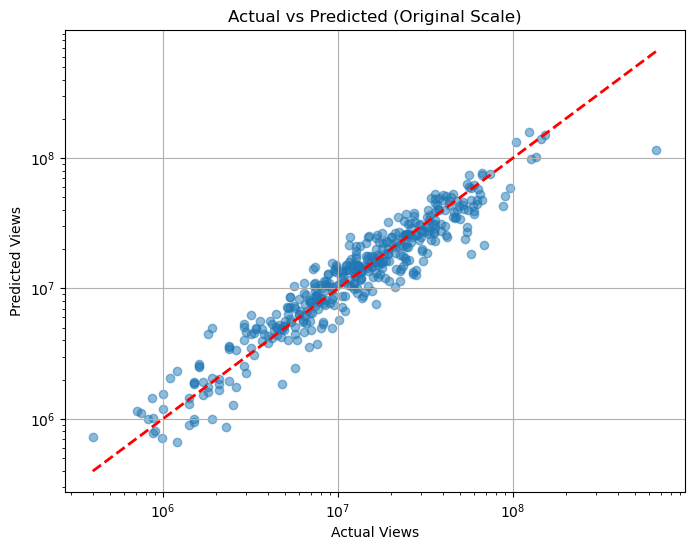

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(actual, preds, alpha=0.5)

max_val = max(max(actual), max(preds))
min_val = min(min(actual), min(preds))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel("Actual Views")
plt.ylabel("Predicted Views")
plt.title("Actual vs Predicted (Original Scale)")
plt.xscale("log")
plt.yscale("log")
plt.grid(True)
plt.show()


In [58]:
# summary 
#RandomForestRegressor:

#Builds N different decision trees (e.g., 100, 300, 500…)

# Each tree is trained on a random subset of:
# - the data (rows)
# - the features (columns)
# - Each tree makes a prediction
# The final prediction = average of all tree predictions
# This reduces overfitting and improves accuracy.
# reduces Sensitivity to noise

In [59]:
# this is the best model so far
# thus, testing some data to check what our model predicts:

In [60]:

# -------------------------
# 1. Features used in training
# -------------------------
FEATURES = [
    'digg_count', 'share_count', 'collect_count', 'comment_count',
    'duration', 'upload_hour', 'like_per_comment', 'share_per_like'
]



# -------------------------
# 2. Prepare input to match training columns
# -------------------------
def prepare_input(video_features):
    df = pd.DataFrame([video_features])
    
    # Calculate ratio features from raw counts (same as training)
    df['like_per_comment'] = df['digg_count'] / (df['comment_count'] + 1)
    df['share_per_like'] = df['share_count'] / (df['digg_count'] + 1)
    
    # Ensure all required columns exist
    for col in FEATURES:
        if col not in df.columns:
            df[col] = 0
    
    # Return in correct order
    return df[FEATURES]


# -------------------------
# 3. Predict final views
# -------------------------
def predict_video(model, scaler, video_features):
    df = prepare_input(video_features)
    
    # Convert to numpy array to avoid feature name warnings
    df_array = df.values
    
    # Scale like training
    df_scaled = scaler.transform(df_array)
    
    # Predict log-space views
    pred_log = model.predict(df_scaled)
    
    # Convert back to actual views
    return np.expm1(pred_log)[0]

In [69]:
# Test cases with realistic values within training distribution
# Training range: digg_count (19,900 - 25,400,000), share_count (299 - 10,200,000)
from datetime import datetime

weak_video = {
    "digg_count": 50000,      # Low end (25th percentile ~357k, but using 50k for weak)
    "share_count": 500,       # Low engagement
    "collect_count": 500,
    "comment_count": 500,
    "duration": 15,
    "upload_hour": 3
}

normal_video = {
    "digg_count": 800000,     # Around median (825,600)
    "share_count": 8000,      # Around median (8,480)
    "collect_count": 26000,   # Around median (26,424)
    "comment_count": 7600,    # Around median (7,615)
    "duration": 40,           # Around median
    "upload_hour": 14
}

viral_video = {
    "digg_count": 5000000,    # High engagement (75th percentile ~1.8M)
    "share_count": 100000,    # High shares
    "collect_count": 200000,  # High collects
    "comment_count": 50000,   # High comments
    "duration": 20,
    "upload_hour": 20
}

# Real video from dataset (zachking - "#MamaSaid to always be a gentleman")
real_video = {
    "digg_count": 1100000,
    "share_count": 637,
    "collect_count": 467,
    "comment_count": 1988,
    "duration": 15,
    "upload_hour": datetime.fromtimestamp(1468105536).hour  # Extract hour from timestamp
}


In [70]:
# Test predictions
print("=== PREDICTIONS ===")
weak_pred = predict_video(best_rf, scaler, weak_video)
normal_pred = predict_video(best_rf, scaler, normal_video)
viral_pred = predict_video(best_rf, scaler, viral_video)
real_pred = predict_video(best_rf, scaler, real_video)

print(f"Weak video:   {weak_pred:,.0f} views")
print(f"Normal video: {normal_pred:,.0f} views")
print(f"Viral video:  {viral_pred:,.0f} views")
print(f"Real video:   {real_pred:,.0f} views (actual: 2,000,000)")

print(f"\nReal video accuracy:")
actual_views = 2000000
error_pct = abs(real_pred - actual_views) / actual_views * 100
print(f"  Predicted: {real_pred:,.0f}")
print(f"  Actual:    {actual_views:,.0f}")
print(f"  Error:     {error_pct:.1f}%")


=== PREDICTIONS ===
Weak video:   1,370,047 views
Normal video: 12,573,704 views
Viral video:  55,112,225 views
Real video:   2,490,118 views (actual: 2,000,000)

Real video accuracy:
  Predicted: 2,490,118
  Actual:    2,000,000
  Error:     24.5%


/opt/homebrew/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/homebrew/lib/python3.14/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [71]:
# Model performance summary
print("=== MODEL PERFORMANCE ===")
print(f"R2 Score (log space): {r2_score(y_test_log, best_rf.predict(X_test_scaled)):.4f}")
print(f"R2 Score (original space): {r2_score(actual, preds):.4f}")
print(f"\nTraining data stats:")
print(f"  Mean play_count: {np.expm1(y_train_log.mean()):,.0f}")
print(f"  Median play_count: {np.expm1(y_train_log.median()):,.0f}")
print(f"  Min play_count: {np.expm1(y_train_log.min()):,.0f}")
print(f"  Max play_count: {np.expm1(y_train_log.max()):,.0f}")


=== MODEL PERFORMANCE ===
R2 Score (log space): 0.9048
R2 Score (original space): 0.4621

Training data stats:
  Mean play_count: 11,504,312
  Median play_count: 12,500,000
  Min play_count: 327,000
  Max play_count: 1,100,000,000


In [72]:
# Verify test inputs are within training range
print("=== VERIFYING TEST INPUTS ===")
print("Training data ranges:")
print(f"  digg_count: {X_train['digg_count'].min():,.0f} - {X_train['digg_count'].max():,.0f}")
print(f"  share_count: {X_train['share_count'].min():,.0f} - {X_train['share_count'].max():,.0f}")

print("\nTest inputs:")
for name, video in [("Weak", weak_video), ("Normal", normal_video), ("Viral", viral_video)]:
    print(f"\n{name}:")
    print(f"  digg_count: {video['digg_count']:,} (in range: {video['digg_count'] >= X_train['digg_count'].min()})")
    print(f"  share_count: {video['share_count']:,} (in range: {video['share_count'] >= X_train['share_count'].min()})")


=== VERIFYING TEST INPUTS ===
Training data ranges:
  digg_count: 19,900 - 25,400,000
  share_count: 299 - 10,200,000

Test inputs:

Weak:
  digg_count: 50,000 (in range: True)
  share_count: 500 (in range: True)

Normal:
  digg_count: 800,000 (in range: True)
  share_count: 8,000 (in range: True)

Viral:
  digg_count: 5,000,000 (in range: True)
  share_count: 100,000 (in range: True)


In [75]:
# Compare predictions with actual values from test set
test_preds_log = best_rf.predict(X_test_scaled)
test_preds = np.expm1(test_preds_log)
test_actual = np.expm1(y_test_log)

results_df = pd.DataFrame({
    
    'Actual Views': test_actual.values,
    'Predicted Views': test_preds,
    'Error': test_preds - test_actual.values,
    'Error %': ((test_preds - test_actual.values) / test_actual.values * 100).round(2)
})

print(results_df.head(100).to_string(index=False))



 Actual Views  Predicted Views         Error  Error %
    6000000.0     6.393115e+06  3.931154e+05     6.55
   10200000.0     1.072069e+07  5.206913e+05     5.10
    7400000.0     9.511719e+06  2.111719e+06    28.54
   11600000.0     2.160183e+07  1.000183e+07    86.22
   22200000.0     2.107295e+07 -1.127046e+06    -5.08
   24200000.0     1.715941e+07 -7.040594e+06   -29.09
   47700000.0     3.999811e+07 -7.701893e+06   -16.15
   27100000.0     3.801786e+07  1.091786e+07    40.29
   23500000.0     2.529885e+07  1.798845e+06     7.65
    8100000.0     1.000588e+07  1.905883e+06    23.53
     397200.0     7.281355e+05  3.309355e+05    83.32
   62900000.0     5.826872e+07 -4.631281e+06    -7.36
    9500000.0     1.354268e+07  4.042677e+06    42.55
   23000000.0     1.398519e+07 -9.014805e+06   -39.19
   12300000.0     1.550557e+07  3.205572e+06    26.06
   56300000.0     7.425100e+07  1.795100e+07    31.88
   12600000.0     1.251389e+07 -8.610592e+04    -0.68
   12700000.0     2.125470e+